In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('Online Retail.xlsx',)

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
cust=data[['CustomerID','Country']].drop_duplicates()
cust.groupby(data['Country'])['CustomerID'].aggregate('count').sort_values(ascending=False)

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Netherlands                9
Denmark                    9
Australia                  9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Canada                     4
Greece                     4
Unspecified                4
USA                        4
Israel                     4
EIRE                       3
Malta                      2
Bahrain                    2
United Arab Emirates       2
Iceland                    1
Lebanon                    1
Lithuania                  1
European Community         1
Czech Republic             1
RSA                        1
Saudi 

In [6]:
data_seg=data.query("Country=='United Kingdom'")

In [7]:
data_seg.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [8]:
data_seg=data_seg[pd.notnull(data_seg['CustomerID'])]

In [9]:
data_seg.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data_seg['Quantity'].min()

-80995

In [11]:
data_seg['UnitPrice'].min()

0.0

In [12]:
data_seg=data_seg[data_seg['Quantity']>0]

In [13]:
data_seg['Total']=data_seg['Quantity']*data_seg['UnitPrice']

data_seg['InvoiceDate']=pd.to_datetime(data_seg['InvoiceDate'])

In [14]:
data_seg.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
data_seg.describe()

,Quantity,UnitPrice,CustomerID,Total
count,354345.000000,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219,20.625073
std,190.428127,17.862067,1594.546025,326.033014
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,14194.000000,4.160000
50%,4.000000,1.950000,15522.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [16]:
import datetime as dt

In [17]:
data_seg.iloc[-1,:]

InvoiceNo                     581586
StockCode                      20685
Description    DOORMAT RED RETROSPOT
Quantity                          10
InvoiceDate      2011-12-09 12:49:00
UnitPrice                       7.08
CustomerID                     13113
Country               United Kingdom
Total                           70.8
Name: 541893, dtype: object

In [18]:
latest_date=dt.datetime(2011,12,10)

In [19]:
RFM_score=data_seg.groupby(data_seg['CustomerID']).agg({'InvoiceDate':lambda x:(latest_date-x.max()).days,'InvoiceNo':lambda x:x.count(),'Total':lambda x:x.sum()})

In [20]:
RFM_score['InvoiceDate']=RFM_score['InvoiceDate'].astype(int)

In [21]:
RFM_score.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total':'Monetry'},inplace=True)

In [22]:
RFM_score.reset_index(inplace=True)

In [23]:
RFM_score

,CustomerID,Recency,Frequency,Monetry
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34
...,...,...,...,...
3916,18280.0,277,10,180.60
3917,18281.0,180,7,80.82
3918,18282.0,7,12,178.05
3919,18283.0,3,756,2094.88


In [24]:
RFM_score.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

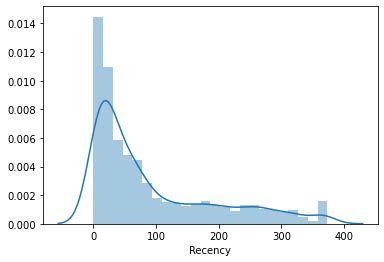

In [25]:
sns.distplot(RFM_score['Recency'])

In [26]:
RFM_score.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

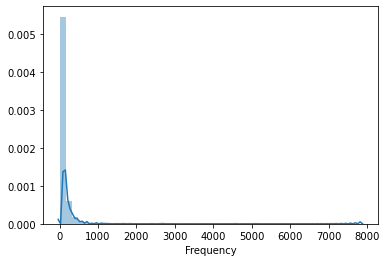

In [27]:
sns.distplot(RFM_score['Frequency'])

In [28]:
RFM_score.Monetry.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetry, dtype: float64

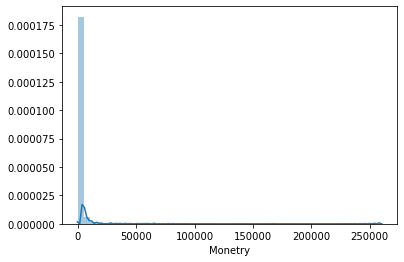

In [29]:
sns.distplot(RFM_score['Monetry'])

In [30]:
RFM_score.iloc[:,[1,2,3]]=np.log(RFM_score.iloc[:,[1,2,3]]+1)

In [31]:
RFM_score

,CustomerID,Recency,Frequency,Monetry
0,12346.0,5.786897,0.693147,11.253955
1,12747.0,1.098612,4.644391,8.342128
2,12748.0,0.000000,8.433159,10.425868
3,12749.0,1.386294,5.298317,8.316760
4,12820.0,1.386294,4.094345,6.849427
...,...,...,...,...
3916,18280.0,5.627621,2.397895,5.201806
3917,18281.0,5.198497,2.079442,4.404522
3918,18282.0,2.079442,2.564949,5.187665
3919,18283.0,1.386294,6.629363,7.647729


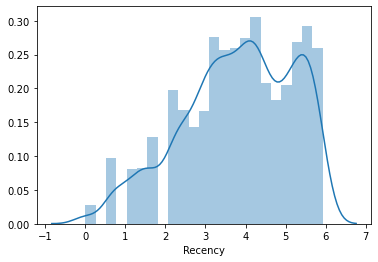

In [32]:
sns.distplot(RFM_score['Recency'])

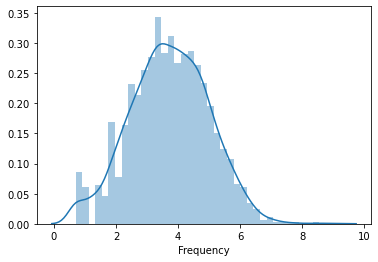

In [33]:
sns.distplot(RFM_score['Frequency'])

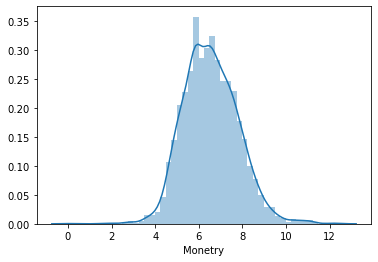

In [34]:
sns.distplot(RFM_score['Monetry'])

In [35]:
from sklearn.cluster import KMeans
wcss=[]
for e in range(1,16):
    km=KMeans(n_clusters=e,random_state=42)
    km.fit(RFM_score.iloc[:,[1,2,3]])
    wcss.append(km.inertia_)

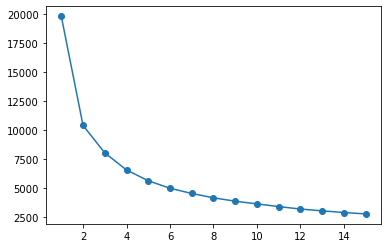

In [36]:
plt.plot(range(1,16),wcss,marker='o')

In [37]:
km=KMeans(n_clusters=3,random_state=42)
km.fit(RFM_score.iloc[:,[1,2,3]])

KMeans(n_clusters=3, random_state=42)

In [38]:
RFM_score['Cluster']=km.labels_

In [39]:
RFM_score

,CustomerID,Recency,Frequency,Monetry,Cluster
0,12346.0,5.786897,0.693147,11.253955,0
1,12747.0,1.098612,4.644391,8.342128,2
2,12748.0,0.000000,8.433159,10.425868,2
3,12749.0,1.386294,5.298317,8.316760,2
4,12820.0,1.386294,4.094345,6.849427,2
...,...,...,...,...,...
3916,18280.0,5.627621,2.397895,5.201806,1
3917,18281.0,5.198497,2.079442,4.404522,1
3918,18282.0,2.079442,2.564949,5.187665,0
3919,18283.0,1.386294,6.629363,7.647729,2


In [42]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
RFM_score.iloc[:,[1,2,3]] = scale.fit_transform(RFM_score.iloc[:,[1,2,3]])

In [43]:
RFM_score

,CustomerID,Recency,Frequency,Monetry,Cluster
0,12346.0,0.976814,0.000000,0.902691,0
1,12747.0,0.185443,0.477499,0.669130,2
2,12748.0,0.000000,0.935364,0.836269,2
3,12749.0,0.234003,0.556525,0.667095,2
4,12820.0,0.234003,0.411027,0.549399,2
...,...,...,...,...,...
3916,18280.0,0.949929,0.206015,0.417242,1
3917,18281.0,0.877494,0.167531,0.353291,1
3918,18282.0,0.351005,0.226203,0.416108,0
3919,18283.0,0.234003,0.717379,0.613432,2


In [45]:
data_melt=pd.melt(RFM_score,id_vars=['CustomerID','Cluster'],value_vars=['Recency','Frequency','Monetry'],var_name='Attributes',value_name='Values')
data_melt.head()

,CustomerID,Cluster,Attributes,Values
0,12346.0,0,Recency,0.976814
1,12747.0,2,Recency,0.185443
2,12748.0,2,Recency,0.000000
3,12749.0,2,Recency,0.234003
4,12820.0,2,Recency,0.234003


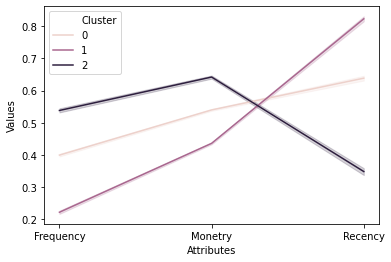

In [46]:
sns.lineplot(x='Attributes',y='Values',hue='Cluster',data=data_melt)